# wyniki testów

In [1]:
import sys
sys.path.append('../main_model')
# autorskie ploty :P

from plots import barplot
from some_functions import *
from popularity_model import *
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
results = get_db('res_f1.csv')
results.drop_duplicates(inplace=True)
results_short = get_db('res_short.csv')
results_short_precise = get_db('res_short_precise.csv')
res_short_f = get_db('res_short_f.csv')

In [10]:
# dodanie f1score
np.array([1,3,4,5])
# results['f1score'] = results[['precision','recall']].apply(lambda x: f1score(x[0],x[1]), axis=1)
# results.to_csv("res_f1.csv", encoding="utf-8", index=False)

array([1, 3, 4, 5])

In [5]:
# usuwam outliersy
results = results[(results['test_articles'] > 2) & (results['train_articles'] > 2)]

results.head(1)

,model,user,number_of_recomm,train_articles,test_articles,precision,recall,weight,f1score
6,final,3,5,9,5,0.0,0.0,"(1, 1, 1)",0.0


### f1 score for different weight

In [6]:
# do średnich
rr = results.groupby(['weight','number_of_recomm'])[['precision','recall','f1score']].mean().reset_index()

names = list(rr['weight'])
n = len(names)
rr.head()

,weight,number_of_recomm,precision,recall,f1score
0,"(1, 1, 1)",5,0.091959,0.037224,0.050101
1,"(1, 1, 1)",10,0.073794,0.057080,0.060773
2,"(1, 1, 1)",15,0.065075,0.078563,0.066799
3,"(1, 1, 50)",5,0.053298,0.021368,0.028652
4,"(1, 1, 50)",10,0.047438,0.036585,0.038798


In [7]:
# rr[rr['number_of_recomm'] == 5 ]['precision']

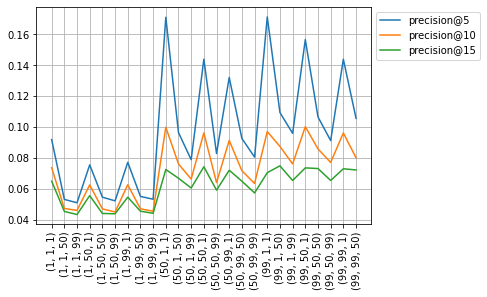

In [7]:
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 5 ]['precision'], label='precision@5')
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 10 ]['precision'], label='precision@10')
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 15 ]['precision'], label='precision@15')
plt.legend(bbox_to_anchor=(1, 1, 0, 0))
plt.xticks(ticks=np.arange(n/3),labels=names[::3], rotation=90)
plt.grid()
plt.show()

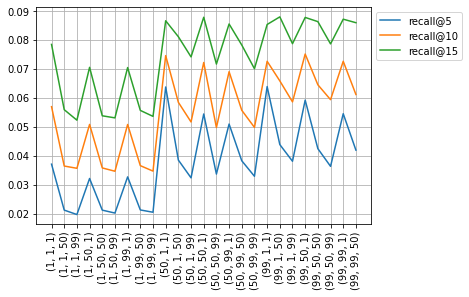

In [8]:
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 5 ]['recall'], label='recall@5')
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 10 ]['recall'], label='recall@10')
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 15 ]['recall'], label='recall@15')
plt.legend(bbox_to_anchor=(1, 1, 0, 0))
plt.xticks(ticks=np.arange(n/3),labels=names[::3], rotation=90)
plt.grid()
plt.show()

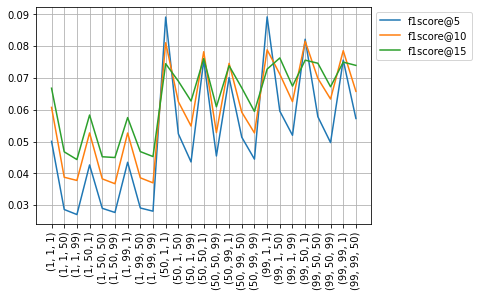

In [9]:
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 5 ]['f1score'], label='f1score@5')
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 10 ]['f1score'], label='f1score@10')
plt.plot(np.arange(n/3),rr[rr['number_of_recomm'] == 15 ]['f1score'], label='f1score@15')
plt.legend(bbox_to_anchor=(1, 1, 0, 0))
plt.xticks(ticks=np.arange(n/3),labels=names[::3], rotation=90)
plt.grid()
plt.show()

Duża waga dla <popularity> i jak najmniejsza dla pozostałych daje najlepsze wyniki przy małej liczbie rekomendacji (5).

(50,50,1) / (99,99,1) / (99,50,1) -> najwyższe wyniki dla większej liczby rekomendacji (15), zadowalające dla mniejszych (5, 10).

ogólnie słabe wyniki dla dużej wagi <department> (szczególnie dla małej liczby rekomendacji (5)).

Mój wybór: (99,50,1) -> mała wariancja wyników, ogólnie wysokie (najwyższe dla 10 i 15, niewiele niższe od najwyższych dla 5)

,number_of_recomm,model,weight,precision,recall,f1score,coverage
0,5,Popularity_model_final,"(1, 1, 1)",0.058537,0.025697,0.033775,0.018076
1,5,Popularity_model_final,"(1, 1, 50)",0.035419,0.014538,0.019419,0.015351
2,5,Popularity_model_final,"(1, 1, 99)",0.036691,0.015035,0.020056,0.014443
3,5,Popularity_model_final,"(1, 50, 1)",0.053446,0.024211,0.031091,0.042602
4,5,Popularity_model_final,"(1, 50, 50)",0.034146,0.013568,0.018371,0.021346
...,...,...,...,...,...,...,...
70,15,Popularity_model_final,"(99, 50, 1)",0.065394,0.076772,0.066864,0.045781
71,15,Popularity_model_final,"(99, 50, 50)",0.059456,0.071028,0.061041,0.039513
72,15,Popularity_model_final,"(99, 50, 99)",0.052174,0.064344,0.054235,0.036425
73,15,Popularity_model_final,"(99, 99, 1)",0.064475,0.076165,0.066053,0.061313


In [3]:

def make_scatter(limit, db,x_thr,y_thr,name):
    # licze srednia z testów dla kazdego przypadku
    db = db.groupby(['number_of_recomm','model','weight']).mean().reset_index()
    fig, ax = plt.subplots()
    x = list(db[db['number_of_recomm'] == limit][name])
    y = list(db[db['number_of_recomm'] == limit]['coverage'])
    names = list(db[db['number_of_recomm'] == limit]['weight'])

    ax.scatter(x,y)
    for i, txt in enumerate(names):
        if x[i] > x_thr and y[i] > y_thr:
            ax.annotate(f'{str(txt)[1:3]}',(x[i],y[i]))
    plt.xlabel(name)
    plt.ylabel('coverage')
    plt.title(f'{limit} recommendations')
    plt.grid()
    plt.show()

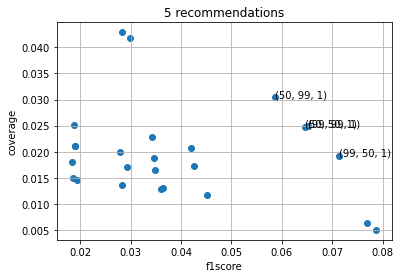

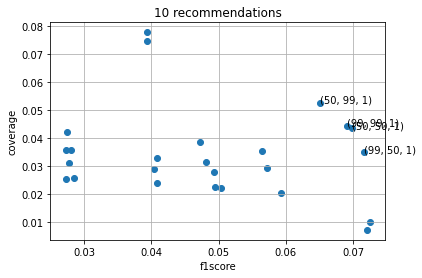

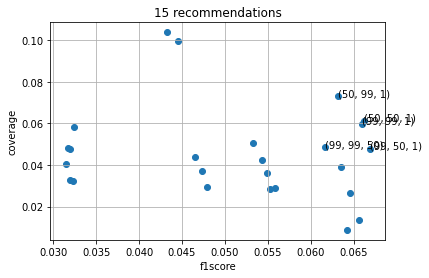

In [4]:
make_scatter(5,results_short,0.055,0.018,'f1score')
make_scatter(10,results_short,0.06,0.03,'f1score')
make_scatter(15,results_short,0.06,0.04,'f1score')

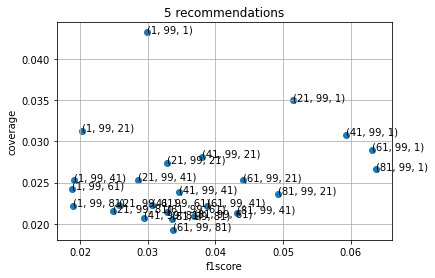

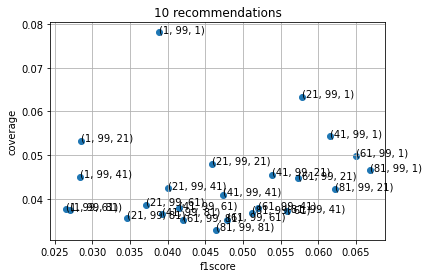

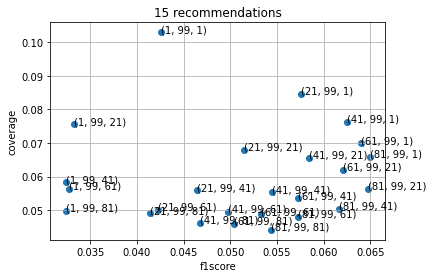

In [6]:
make_scatter(5,results_short_precise,0,0,'f1score')
make_scatter(10,results_short_precise,0,0,'f1score')
make_scatter(15,results_short_precise,0,0,'f1score')

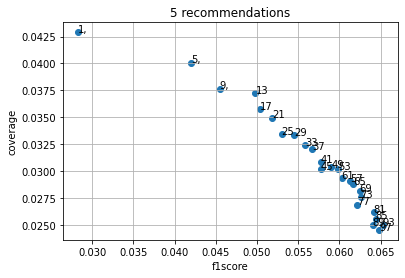

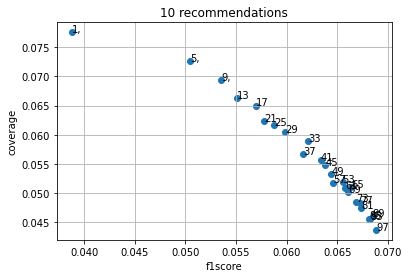

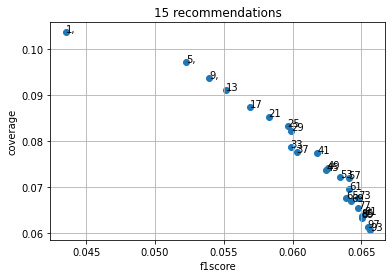

In [6]:
make_scatter(5,res_short_f,0,0,'f1score')
make_scatter(10,res_short_f,0,0,'f1score')
make_scatter(15,res_short_f,0,0,'f1score')

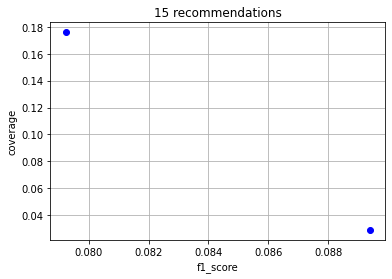

In [8]:
x_sum = [0.079231, 0.089397]
y_sum = [0.175947, 0.028885]
x_prob = [0.072536,0.073523,0.075821]
y_prob = [0.196930,0.175129,0.187755]


fig, ax = plt.subplots()
ax.scatter(x_prob,y_prob, color='blue')
ax.scatter(x_sum,y_sum, color='red')
plt.xlabel('f1_score')
plt.ylabel('coverage')
plt.title(f'15 recommendations')
plt.grid()
plt.show()
